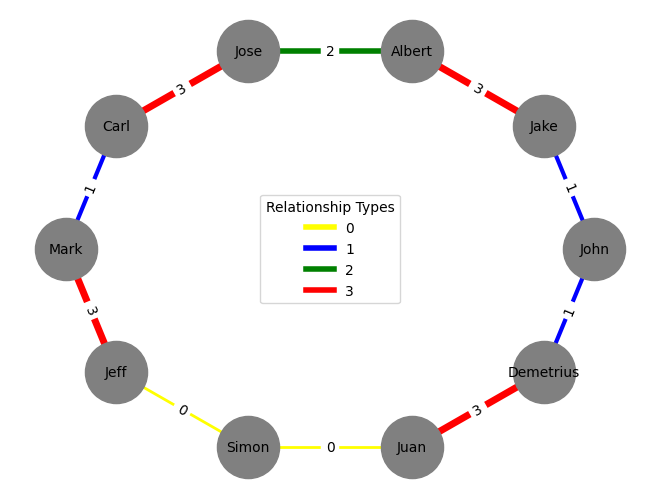

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('friends_network.csv')
G = nx.Graph()

for index, row in data.iterrows():
    G.add_edge(row['Person_A'], row['Person_B'], weight=row['Relationship_Type'])

edge_colors = []
edge_labels = {}
edge_thickness = []

for u, v, data in G.edges(data=True):
    relationship_type = data['weight']
    if relationship_type == 0:
        edge_colors.append('yellow')
        edge_thickness.append(2)
        edge_labels[(u, v)] = '0'
    elif relationship_type == 1:
        edge_colors.append('blue')
        edge_thickness.append(3)
        edge_labels[(u, v)] = '1'
    elif relationship_type == 2:
        edge_colors.append('green')
        edge_thickness.append(4)
        edge_labels[(u, v)] = '2'
    elif relationship_type == 3:
        edge_colors.append('red')
        edge_thickness.append(5)
        edge_labels[(u, v)] = '3'

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='gray', node_size=2000,
        font_size=10, edge_color=edge_colors, width=edge_thickness)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

legend_labels = {
    '0': 'yellow',
    '1': 'blue',
    '2': 'green',
    '3': 'red'
}

handles = [plt.Line2D([0], [0], color=color, lw=4)
            for color in legend_labels.values()]
plt.legend(handles, legend_labels.keys(), title="Relationship Types",
           loc='center')

plt.show()